<a href="https://colab.research.google.com/github/Mohammed-Saif-07/ML-winter-quarter/blob/main/activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
# Target Labeling (Identifying 7)
y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7')

In [6]:
sgd_clf = SGDClassifier(random_state=42)

In [7]:
param_grid = [
    {'alpha': [0.0001, 0.001], 'max_iter': [1000, 2000]}
]
grid_search = GridSearchCV(sgd_clf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train_7)

best_sgd_clf = grid_search.best_estimator_
print(f"Best SGD Parameters: {grid_search.best_params_}")

Best SGD Parameters: {'alpha': 0.001, 'max_iter': 1000}


In [8]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, method="predict_proba")
y_train_pred_forest = (y_probas_forest[:, 1] >= 0.5)

In [9]:
y_train_pred_sgd = cross_val_predict(best_sgd_clf, X_train, y_train_7, cv=3)

def evaluate_model(y_true, y_pred, name):
    print(f"\n--- {name} Performance ---")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")

evaluate_model(y_train_7, y_train_pred_sgd, "SGD Classifier")
evaluate_model(y_train_7, y_train_pred_forest, "Random Forest")


--- SGD Classifier Performance ---
Confusion Matrix:
[[53092   643]
 [  926  5339]]
Precision: 0.8925
Recall: 0.8522
F1 Score: 0.8719

--- Random Forest Performance ---
Confusion Matrix:
[[53653    82]
 [  575  5690]]
Precision: 0.9858
Recall: 0.9082
F1 Score: 0.9454


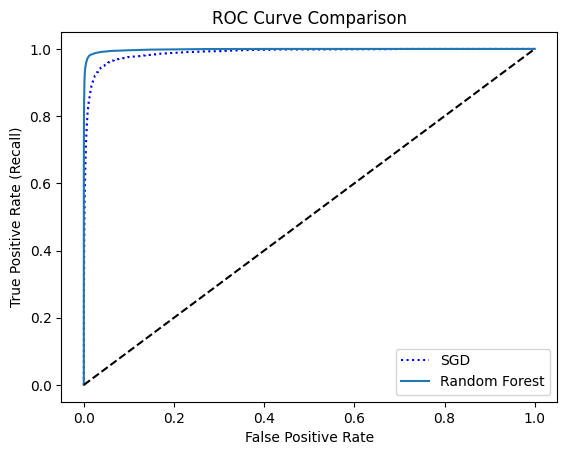

SGD ROC AUC Score: 0.9201
Forest ROC AUC Score: 0.9533


In [10]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_7, cross_val_predict(best_sgd_clf, X_train, y_train_7, cv=3, method="decision_function"))
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

plt.plot(fpr_sgd, tpr_sgd, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc="lower right")
plt.title("ROC Curve Comparison")
plt.show()

print(f"SGD ROC AUC Score: {roc_auc_score(y_train_7, y_train_pred_sgd):.4f}")
print(f"Forest ROC AUC Score: {roc_auc_score(y_train_7, y_train_pred_forest):.4f}")

In this activity, I trained two binary classifiers to distinguish the digit 7 from all other digits in the MNIST dataset.

Model Comparison: The Random Forest Classifier consistently outperformed the SGD Classifier. While SGD is faster for large datasets, Random Forest achieved higher precision and recall, as evidenced by a larger area under the ROC curve (AUC).

Performance Metrics:

Precision measures how many of our predicted "7s" were actually "7s."

Recall measures how many actual "7s" the model correctly identified.

The F1 Score provided a balanced view of these two metrics.

Insights: A high accuracy score can be deceiving on this dataset because "7s" represent only about 10% of the data. Even a "dumb" classifier that always predicts "Not-7" would be 90% accurate. Therefore, looking at the Confusion Matrix and the ROC Curve was essential to understand the true effectiveness of the models. The ROC Curve showed that Random Forest has a better trade-off between sensitivity and specificity compared to SGD.